<a href="https://colab.research.google.com/github/GildasTaliah/FinancialTrading/blob/main/MLTreeBasedModels__a_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING WITH TREE BASED MODELS WITH PYTHON**

**Description**

Decision trees are supervised learning models used for problems involving classification and regression. Tree models present a high flexibility that comes at a price: on one hand, trees are able to capture complex non-linear relationships; on the other hand, they are prone to memorizing the noise present in a dataset. By aggregating the predictions of trees that are trained differently, ensemble methods take advantage of the flexibility of trees while reducing their tendency to memorize noise. Ensemble methods are used across a variety of fields and have a proven track record of winning many machine learning competitions.

In this course, you'll learn how to use Python to train decision trees and tree-based models with the user-friendly scikit-learn machine learning library. You'll understand the advantages and shortcomings of trees and demonstrate how ensembling can alleviate these shortcomings, all while practicing on real-world datasets. Finally, you'll also understand how to tune the most influential hyperparameters in order to get the most out of your models.



# **1. Classification and Regression Trees**

Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

In [1]:
# Import data from DataCamp
import pandas as pd

# Automobile miles per gallon  data
url = "https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv"
auto_df = pd.read_csv(url)

# Breast cancer data
url =  "https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv"
wbc_df = pd.read_csv(url)

# Bike data
url = "https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv"
bikes_df = pd.read_csv(url)

In [2]:
# Save as CSV
#auto_df.to_csv('auto.csv', index=False)
#wbc_df.to_csv('wbc.csv', index=False)
#bikes_df.to_csv('bikes.csv', index=False)

Train your first classification tree
In this exercise you'll work with the [Wisconsin Breast Cancer](https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv) Dataset from the UCI machine learning repository. You'll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (radius_mean) and its mean number of concave points (concave points_mean).

The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to X_train and X_test, while the arrays of labels are assigned to y_train and y_test where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called SEED which is set to 1.

In [3]:
# Vie wbc data
wbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
wbc_df['diagnosis'] = wbc_df['diagnosis'].map({'M': 1, 'B': 0})
wbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Import packages necessary to split data
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test, with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(wbc_df[['radius_mean', 'concave points_mean']], \
                                   wbc_df['diagnosis'], test_size=0.2, stratify=wbc_df.diagnosis)
X_train.head(), X_test.head(), y_train.head(), y_test.head()

(     radius_mean  concave points_mean
 63         9.173              0.02180
 7         13.710              0.05985
 519       12.750              0.02995
 300       19.530              0.10620
 499       20.590              0.11210,
      radius_mean  concave points_mean
 248        10.65              0.01615
 489        16.69              0.02307
 0          17.99              0.14710
 405        10.94              0.02932
 336        12.99              0.02098,
 63     0
 7      1
 519    0
 300    1
 499    1
 Name: diagnosis, dtype: int64,
 248    0
 489    1
 0      1
 405    0
 336    0
 Name: diagnosis, dtype: int64)

In [6]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
SEED = 75
dt = DecisionTreeClassifier(max_depth = 6, random_state=SEED)

# Fit dt to the training set

dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

# map to M and B
y_pred_map = ['M' if val == 1 else 'B' for val in y_pred]
print(y_pred_map[0:5])

"Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set."

[0 0 1 0 0]
['B', 'B', 'M', 'B', 'B']


"Awesome! You've just trained your first classification tree! You can see the first five predictions made by the fitted tree on the test set in the console. In the next exercise, you'll evaluate the tree's performance on the entire test set."

**Evaluate the classification tree**

Now that you've fit your first classification tree, it's time to evaluate its performance on the test set. You'll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.

The trained model dt from the previous exercise is loaded in your workspace along with the test set features matrix X_test and the array of labels y_test.

In [7]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

"Not bad! Using only two features, your tree was able to achieve an accuracy of 88%!"

Test set accuracy: 0.90


'Not bad! Using only two features, your tree was able to achieve an accuracy of 88%!'

**Logistic regression vs classification tree**

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the shell to learn more about this function.

X_train, X_test, y_train, y_test, the model dt that you've trained in an earlier exercise, as well as the function plot_labeled_decision_regions() are available in your workspace.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_labeled_decision_regions(X, y, models):
    if X.shape[1] != 2:
        raise ValueError("X must have exactly two features for 2D visualization.")

    if len(models) != 2:
        raise ValueError("Exactly two models must be provided.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    feature1, feature2 = X.columns

    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    scatter_colors = ['red', 'green', 'blue']

    for i, model in enumerate(models):
        grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
        try:
            Z = model.predict(grid_points)
            if isinstance(Z, list) or isinstance(Z, pd.Series):
                Z = np.array(Z)
            if not np.issubdtype(Z.dtype, np.number):
                raise ValueError(f"Non-numeric predictions detected: {Z[:10]}")

            if Z.ndim > 1:  # Convert probabilities to class labels
                Z = np.argmax(Z, axis=1)
        except Exception as e:
            raise ValueError(f"Model {i+1} failed during prediction: {e}")

        try:
            Z = Z.reshape(xx.shape)
        except Exception as e:
            raise ValueError(f"Failed to reshape predictions for Model {i+1}: {e}")

        try:
            axes[i].contourf(xx, yy, Z, alpha=0.8, cmap=cmap)
        except Exception as e:
            raise ValueError(f"Failed to plot decision regions for Model {i+1}: {e}")

        for idx, class_label in enumerate(np.unique(y)):
            axes[i].scatter(X.loc[y == class_label, feature1],
                            X.loc[y == class_label, feature2],
                            c=scatter_colors[idx], label=f'Class {class_label}', edgecolor='k')

        axes[i].set_title(f'Decision regions for model {i + 1}')
        axes[i].set_xlabel(feature1)
        axes[i].set_ylabel(feature2)
        axes[i].legend()

    plt.tight_layout()
    plt.show()


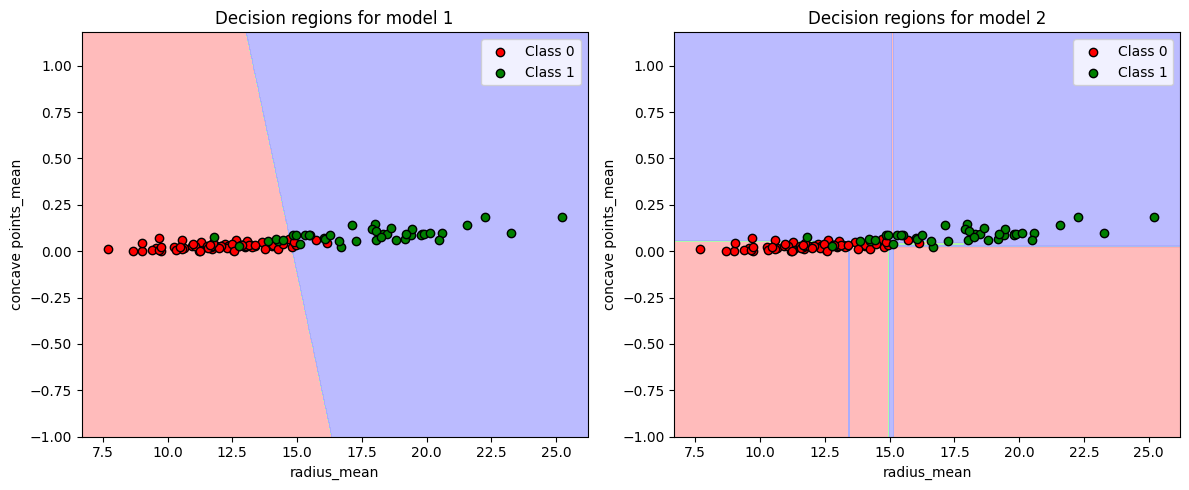

'Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.'

In [9]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

clfs
# Review the decision regions of the two classifiers
# convert y to numeric

plot_labeled_decision_regions(X_test, y_test, clfs)

"Great work! Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions."

**Classification Trees Learning**

A **Decision Tree** is a data structure consisting of Hierarchy of Notes.
The tree like structure is like this: Root, then internal nodes and lastly the leafs. The root starts with a single feature, splitted into two bracnches and then comes the **first internal node**. The first internal is then splitted across that **depth level** using a single feature to result to the **next internal node** and so on until the **leafs** are gotten, which presents the prediction.

- Thus the **maximum depth** equals: Root (1) + number of Internal Nodes (NoIN) = 1 + NoIN.

The nodes of a classification tree are grown recursively; in other words, the obtention of an internal node or a leaf depends on the state of its predecessors.

To produce the purest leafs possible, at each node, a tree asks a question involving one feature **f** and a split-point **sp**.

- But how does it know which feature and which split-point to pick?

It does so by maximizing **Information gain! IG** The tree considers that every node contains information and aims at maximizing the Information Gain obtained after each split. Consider the case where a node with N samples is split into a left-node with Nleft samples and a right-node with N right samples.

The information gain for such split is given by the formula shown here.

$$IG(f, sp) = I(parent) -  \frac{N_{left}}{N} * I(left) - \frac{N_{right}}{N} * I(right)$$

Where:

-  $I(node)$ represents the **impurity of the node**.
- N, N-left, N-right total number of samples, left samples, right samples.  


A question that you may have in mind here is:
- What criterion is used to measure the impurity of a node?


Well, there are different criteria you can use among which are the **gini-index, entropy, log loss** for classification, see more [see more](https://scikit-learn.org/1.5/modules/tree.html#tree-mathematical-formulation), **squared error, friedman_mse, poisson** for regression.

Now that you know what is Information gain, let's describe how a classification tree learns.

At each Node, split data based on **f** and **sp** to **maximize the** $IG(node)$.

If $IG(node) = 0$, declare the node a **leaf**

**Growing a classification tree**

In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

- The existence of a node depends on the state of its predecessors.
- The impurity of a node can be determined using different criteria such as entropy and the gini-index.

- When the information gain resulting from splitting a node is null, the node is declared as a leaf.
- When an internal node is split, the split is performed in such a way so that information gain is minimized.

Absolutely so! (4) It's quite the contrary! Actually, splitting an internal node always involves maximizing information gain!




**Using entropy as a criterion**

In this exercise, you'll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You'll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.

X_train as well as the array of labels y_train are available in your workspace.

In [10]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

"Wonderful! In the next exercise, you'll compare the accuracy of dt_entropy \
to the accuracy of a another tree trained using the gini-index as the information criterion."

"Wonderful! In the next exercise, you'll compare the accuracy of dt_entropy to the accuracy of a another tree trained using the gini-index as the information criterion."

**Entropy vs Gini index**

In this exercise you'll compare the test set accuracy of dt_entropy to the accuracy of another tree named dt_gini. The tree dt_gini was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword 'gini'.

X_test, y_test, dt_entropy, as well as accuracy_gini which corresponds to the test set accuracy achieved by dt_gini are available in your workspace.

In [11]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}', '\n')


# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Evaluate accuracy
y_pred = dt_gini.predict(X_test)

# Evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}', '\n')

"Nice work! Notice how the two models achieve accuracy greater that 85%. \
Most of the time, the gini index and entropy lead to the same results. \
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn."

Accuracy achieved by using entropy: 0.912 

Accuracy achieved by using the gini index: 0.895 



'Nice work! Notice how the two models achieve accuracy greater that 85%. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.'

**Train your first regression tree**

In this exercise, you'll train a regression tree to predict the mpg (miles per gallon)  consumption of cars in the auto-mpg dataset using all the six available features.

The dataset is processed for you and is split to 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [12]:
auto_df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [13]:
auto_df = pd.get_dummies(auto_df, columns=['origin'], dtype=int)

In [14]:
auto_df.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


min_sample_leaf of 0.13 implies, each leaf has to contain at least 13% of the training data.

Infrormation criteria for regression:

$$I(node) = MSE(node) = \frac{1}{n_{Node}} * \sum_{i \in node}^{} (y^{(i)} - \hat{y}_{node}) ^2.$$
where (mean-target-value):
$$\hat{y}_{node} = \frac{1}{n_{Node}} * \sum_{i \in node}^{} y^{(i)}. $$

In [15]:
# split the auto data
from sklearn.model_selection import train_test_split

# Split data into 80% train and 20% test, with stratified sampling

columns = ['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']
X_train, X_test, y_train, y_test = train_test_split(auto_df[columns], auto_df.mpg,
                                                    test_size=0.2)

In [16]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

"Great work! In the next exercise, you'll evaluate dt's performance on the test set."

"Great work! In the next exercise, you'll evaluate dt's performance on the test set."

**Evaluate the regression tree**

In this exercise, you will evaluate the test set performance of dt using the Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model's predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model's Mean Squared Error (MSE).

The features matrix X_test, the array y_test, as well as the decision tree regressor dt that you trained in the previous exercise are available in your workspace.

In [17]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

"Great work! In the next exercise, you'll compare the test-set RMSE of dt to that of \
a linear regression model trained on the same dataset."

Test set RMSE of dt: 3.85


"Great work! In the next exercise, you'll compare the test-set RMSE of dt to that of a linear regression model trained on the same dataset."

**Linear regression vs regression tree**

In this exercise, you'll compare the test set RMSE of dt to that achieved by a linear regression model. We have already instantiated a linear regression model lr and trained it on the same dataset as dt.

The features matrix X_test, the array of labels y_test, the trained linear regression model lr, mean_squared_error function which was imported under the alias MSE and rmse_dt from the previous exercise are available in your workspace.

In [18]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

# Predict test set labels
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr), '\n')

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt), '\n')

"Awesome! You're on your way to master decision trees."

Linear Regression test set RMSE: 3.76 

Regression Tree test set RMSE: 3.85 



"Awesome! You're on your way to master decision trees."

# **2. The Bias Variance Trade-Off**

The bias-variance tradeoff is one of the fundamental concepts in supervised machine learning. In this chapter, you'll understand how to diagnose the problems of overfitting and underfitting. You'll also be introduced to the concept of ensembling where the predictions of several models are aggregated to produce predictions that are more robust, this robustness reduces the chances of overfitting.

**Overfitting**

When a model overfits the training set, its predictive power on **unseen datasets** is pretty low. The model is said to have clearly memorized the **noise** present in the **training set**. Such model achieves a low training set error and a high test set error.
$$\,$$

**Underfitting**

When a model underfits the data, the **training set error** is roughly equal to the **test set error**. However, both errors are **relatively high**. Now the trained model isn't flexible enough to capture the **complex dependency** between features and labels. In analogy, it's like teaching calculus to a 3-year old. The child does not have the required mental abstraction level that enables him to understand calculus.
$$\,$$

**Generalization Error**

The generalization error of a model tells you how much it generalizes on unseen data. It can be decomposed into 3 terms: **bias, variance and irreducible error** where the irreducible error is the error contribution of noise.

**Complexity, bias and variance**

In the video, you saw how the complexity of a model labeled $\hat{f}$ influences the bias and variance terms of its generalization error.
Which of the following correctly describes the relationship between $\hat{f}$'s complexity and $\hat{f}$'s bias and variance terms?

- As the complexity of $\hat{f}$ decreases, the bias term decreases while the variance term increases.

- As the complexity of $\hat{f}$ decreases, both the bias and the variance terms increase.

- As the complexity of $\hat{f}$ increases, the bias term increases while the variance term decreases.
- As the complexity of $\hat{f}$ increases, the bias term decreases while the variance term increases.

Great work! (4) You're now able to relate model complexity to bias and variance!

**Overfitting and underfitting**

In this exercise, you'll visually diagnose whether a model is overfitting or underfitting the training set.

For this purpose, we have trained two different models A and B on the auto dataset to predict the mpg consumption of a car using only the car's displacement (displ) as a feature.

The following figure shows you scatterplots of mpg versus displ along with lines corresponding to the training set predictions of models A and B in red.

A: Plotted data with fitted plot, closely following the data
B: Plotted data with fitted plot, trying to catch the tredn of the data.

- A suffers from high bias and overfits the training set.
- A suffers from high variance and underfits the training set.
- B suffers from high bias and underfits the training set.
- B ffers from high variance and underfits the training set.

Absolutely! (B) Model B is not able to capture the nonlinear dependence of mpg on displ.

Please give a rating:

**Recap**

When you left 4 days ago, you worked on The Bias-Variance Tradeoff, chapter 2 of the course Machine Learning with Tree-Based Models in Python. Here is what you covered in your last lesson:
You learned about the bias-variance tradeoff, a crucial concept in supervised machine learning that helps diagnose overfitting and underfitting issues. Here are the key points:
- Generalization Error: It's the measure of how well a model performs on unseen data. Ideally, you want a model (fhat) that closely approximates the true function (f) without capturing noise in the data.
- Overfitting vs. Underfitting:

Overfitting occurs when fhat fits the training data too closely, capturing noise as if it were a signal. This results in low error on training data but high error on unseen data.
Underfitting happens when fhat is too simple to capture the underlying pattern of the data, leading to high error on both training and unseen data.
Bias-Variance Tradeoff:
Bias: The difference between the average prediction of our model and the correct value. High bias can cause underfitting.
Variance: The variability of model predictions for a given data point. High variance can cause overfitting.
Balancing bias and variance is crucial for creating models that generalize well. Ideally, you want low bias and low variance to achieve the lowest generalization error.
- Model Complexity: Influences bias and variance. Increasing a model's complexity (e.g., increasing the maximum tree depth in a decision tree) tends to decrease bias but increase variance, and vice versa.
You practiced identifying whether a model is overfitting or underfitting based on its bias and variance, using visual diagnostics and understanding the relationship between model complexity, bias, and variance. For example, increasing the complexity of a model (fhat) decreases the bias term while increasing the variance term:


```
 # Increasing model complexity decreases bias but increases variance
```
This foundational knowledge sets the stage for more advanced machine learning concepts, such as ensembling, where multiple models are combined to improve prediction accuracy.
The goal of the next lesson is to learn how to estimate a supervised machine learning model's generalization error using cross-validation to identify and correct bias and variance issues.



**Diagnose Problem**

Once you have computed fhat's cross-validation-error, you can check if it is greater than fhat's training set error. If it is greater, fhat is said to suffer from high variance. In such case, fhat has overfit the training set. To remedy this try decreasing fhat's complexity. For example, in a decision tree you can reduce the **maximum-tree-depth or increase the maximum-samples-per-leaf**. In addition, you may also **gather more data to train fhat**.


On the other hand, fhat is said to suffer from high bias if its cross-validation-error is roughly equal to the training error but much greater than the desired error. In such case fhat underfits the training set. To remedy this try increasing the model's complexity or gather more relevant features for the problem.

**Instantiate the model**

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

In [19]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split


X = auto_df.drop(columns=['mpg'])
y = auto_df.mpg
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)


"Great work! In the next exercise, you'll evaluate dt's CV error."

"Great work! In the next exercise, you'll evaluate dt's CV error."

**Evaluate the 10-fold CV error**

In this exercise, you'll evaluate the 10-fold CV Root Mean Squared Error (RMSE) achieved by the regression tree dt that you instantiated in the previous exercise.

In addition to dt, the training data including X_train and y_train are available in your workspace. We also imported cross_val_score from sklearn.model_selection.

Note that since cross_val_score has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

Next, call cross_val_score() by passing dt, X_train, y_train; set the parameters cv to 10 for 10-fold-cross-validation and scoring to neg_mean_squared_error to compute the negative-mean-squared-errors. The scoring parameter was set so because cross_val_score() does not allow computing the mean-squared-errors directly.

Finally, set **n_jobs to -1** to exploit all available CPUs in computation. The result is a numpy-array of the 10 negative mean-squared-errors achieved on the 10-folds. You can multiply the result by minus-one to obtain an array of CV-MSE. After that, fit dt to the training set and evaluate the labels of the training and test sets.

In [20]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10,
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

"Great work! A very good practice is to keep the test set untouched until you are \
confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set."

CV RMSE: 5.14


"Great work! A very good practice is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set."

**Evaluate the training error**

You'll now evaluate the training set RMSE achieved by the regression tree dt that you instantiated in a previous exercise.

In addition to dt, X_train and y_train are available in your workspace.

Note that in scikit-learn, the MSE of a model can be computed as follows:

MSE_model = mean_squared_error(y_true, y_predicted)
where we use the function mean_squared_error from the metrics module and pass it the true labels y_true as a first argument, and the predicted labels from the model y_predicted as a second argument.

In [21]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

"Awesome! Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise."

Train RMSE: 5.15


'Awesome! Notice how the training error is roughly equal to the 10-folds CV error you obtained in the previous exercise.'

**High bias or high variance?**

In this exercise you'll diagnose whether the regression tree dt you trained in the previous exercise suffers from a bias or a variance problem.

The training set RMSE (RMSE_train) and the CV RMSE (RMSE_CV) achieved by dt are available in your workspace. In addition, we have also loaded a variable called baseline_RMSE which corresponds to the root mean-squared error achieved by the regression-tree trained with the disp feature only (it is the RMSE achieved by the regression tree trained in chapter 1, lesson 3). Here baseline_RMSE serves as the baseline RMSE above which a model is considered to be underfitting and below which the model is considered 'good enough'.

Does dt suffer from a high bias or a high variance problem?

- dt suffers from high variance because RMSE_CV is far less than RMSE_train.
- dt suffers from high bias because RMSE_CV ≈  RMSE_train and both scores are greater than baseline_RMSE.
- dt is a good fit because RMSE_CV
≈
 RMSE_train and both scores are smaller than baseline_RMSE.


 Correct! (3) dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels.

**Ensemble Model**

Ensemble learning can be summarized as follows:

-As a first step, different models are trained on the same dataset. -Each model makes its own predictions.

-A meta-model then aggregates the predictions of individual models and outputs a final prediction. -The final prediction is more robust and less prone to errors than each individual model.

-The best results are obtained when the models are skillful but in different ways meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust.

... read more on Notes!

**Define the ensemble**

In the following set of exercises, you'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [22]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("jeevannagaraj/indian-liver-patient-dataset")

#print("Path to dataset files:", path)

In [23]:
# Read data

indianBC = pd.read_csv('indian_liver_patient.csv')
indianBC_preprocessed = pd.read_csv('indian_liver_patient_preprocessed.csv')

# show head
indianBC.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
print(indianBC_preprocessed.columns.to_list())
indianBC_preprocessed.head()#; indianBC_preprocessed.columns.to_list()

['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std', 'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std', 'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std', 'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease']


,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [25]:
# drop unnamed column
indianBC_preprocessed.drop(columns=['Unnamed: 0'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(indianBC_preprocessed.drop(columns=['Liver_disease']),
                                                    indianBC_preprocessed.Liver_disease, #stratify= indianBC_preprocessed.Liver_disease,
                                                    test_size=0.35)

In [26]:
#indianBC.plot(kind = 'hist', subplots= True)
#plt.show()
indianBC.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Define the ensemble**

In the following set of exercises, you'll work with the Indian Liver Patient Dataset from the UCI Machine learning repository.

In this exercise, you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

The classes LogisticRegression, DecisionTreeClassifier, and KNeighborsClassifier under the alias KNN are available in your workspace.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier

# Set seed for reproducibility
SEED= 80

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

"Great! In the next exercise, you will train these classifiers and evaluate their test set accuracy."

'Great! In the next exercise, you will train these classifiers and evaluate their test set accuracy.'

**Evaluate individual classifiers**

In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

The dataset is already loaded and preprocessed for you (numerical features are standardized) and it is split into 70% train and 30% test. The features matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have loaded the list classifiers from the previous exercise, as well as the function accuracy_score() from sklearn.metrics.

In [28]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:

    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

    "Great work! Notice how Logistic Regression achieved the highest accuracy of 74.1%."

Logistic Regression : 0.695
K Nearest Neighbours : 0.719
Classification Tree : 0.704


In [29]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:

    # Fit clf to the training set
    clf.fit(X_train, y_train)

    # Predict y_pred
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

    "Great work! Notice how Logistic Regression achieved the highest accuracy of 74.4%."

Logistic Regression : 0.695
K Nearest Neighbours : 0.719
Classification Tree : 0.704


**Better performance with a Voting Classifier**

Finally, you'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by majority voting.

X_train, X_test,y_train, y_test, the list classifiers defined in a previous exercise, as well as the function accuracy_score from sklearn.metrics are available in your workspace.

In [30]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)

# Fit vc to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

"Great work! Notice how the voting classifier achieves a test set accuracy of \
74.4% too. This value is greater than/equal that achieved by LogisticRegression."

Voting Classifier: 0.709


'Great work! Notice how the voting classifier achieves a test set accuracy of 74.4% too. This value is greater than/equal that achieved by LogisticRegression.'

# **3. Bagging And Random Forest**

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

[see more here](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier)

**Define the bagging classifier**

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [32]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
# base estimator
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1)

"Great! In the following exercise, you'll train bc and evaluate its test set performance."

"Great! In the following exercise, you'll train bc and evaluate its test set performance."

**Evaluate Bagging performance**

Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.

The Indian Liver Patient dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the bagging classifier bc that you instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [35]:
# Fit dt to the training data
dt.fit(X_train, y_train)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test_dt = accuracy_score(y_test, y_pred_dt)
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

"Great work! A single tree dt would have achieved an accuracy of 67% which is 7.5% lower than bc's accuracy!"

Test set accuracy of dt: 0.67
Test set accuracy of bc: 0.72


"Great work! A single tree dt would have achieved an accuracy of 63% which is 4% lower than bc's accuracy!"

**OOB INstances/Scores**

On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

Consider the test-set accuracy is about 93.6% and the OOB-accuracy is about 92.5%. The two obtained accuracies are pretty close though not exactly equal. These results highlight how OOB-evaluation can be an efficient technique to obtain a performance estimate of a bagged-ensemble on unseen data without performing cross-validation.

**Prepare the ground**

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [37]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt,
                       n_estimators=50,
                       oob_score=True,
                       random_state=1)



"Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy."

"Great! In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy."

**OOB Score vs Test Set Score**

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [39]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(indianBC_preprocessed.drop(columns=['Liver_disease']),
                                                    indianBC_preprocessed.Liver_disease, stratify= indianBC_preprocessed.Liver_disease,
                                                    test_size=0.2)

In [41]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

"Great work! The test set accuracy and the OOB accuracy of bc are  equal to 64.7% and 71% resp.!"

Test set accuracy: 0.647, OOB accuracy: 0.717


'Great work! The test set accuracy and the OOB accuracy of bc are  equal to 64.7 and 70% resp.!'

**RF Training**

The diagram here shows the training procedure for random forests. Notice how each tree forming the ensemble is trained on a different bootstrap sample from the training set. In addition, when a tree is trained, at each node, only d features are sampled from all features without replacement. The node is then split using the sampled feature that **maximizes information gain**. In scikit-learn d defaults to the square-root of the number of features. For example, if there are 100 features, only 10 features are sampled at each node.

Once trained, predictions can be made on new instances. When a new instance is fed to the different base estimators, each of them outputs a prediction. The predictions are then collected by the random forests meta-classifier and a final prediction is made depending on the nature of the problem.


For classification, the final prediction is made by majority voting. The corresponding scikit-learn class is RandomForestClassifier. For regression, the final prediction is the average of all the labels predicted by the base estimators. The corresponding scikit-learn class is RandomForestRegressor. In general, Random Forests achieves a lower variance than individual trees.



**Train an RF regressor**

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

In [44]:
# Bike data head
bikes_df.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [46]:
bikes_df.describe()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
count,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.0,1488.000000,1488.000000,1488.000000
mean,11.500000,0.016129,0.709677,0.732083,0.627359,0.157783,280.987903,13747.500000,7.500000,1.0,0.710349,0.057796,0.231855
std,6.924514,0.126014,0.454064,0.081782,0.171463,0.101847,221.170077,429.692914,0.500168,0.0,0.453753,0.233435,0.422159
min,0.000000,0.000000,0.000000,0.560000,0.190000,0.000000,2.000000,13004.000000,7.000000,1.0,0.000000,0.000000,0.000000
25%,5.750000,0.000000,0.000000,0.660000,0.490000,0.104500,90.000000,13375.750000,7.000000,1.0,0.000000,0.000000,0.000000
50%,11.500000,0.000000,1.000000,0.720000,0.650000,0.164200,255.000000,13747.500000,7.500000,1.0,1.000000,0.000000,0.000000
75%,17.250000,0.000000,1.000000,0.800000,0.780000,0.223900,414.000000,14119.250000,8.000000,1.0,1.000000,0.000000,0.000000
max,23.000000,1.000000,1.000000,1.000000,0.940000,0.611900,941.000000,14491.000000,8.000000,1.0,1.000000,1.000000,1.000000


In [53]:
# Split bike data
X_train, X_test, y_train, y_test = train_test_split(bikes_df.drop('instant', axis = 1) ,
                                            bikes_df.instant ,
                                                    test_size=0.2)
# stratify= bikes_df.instant: not needed when dealing with a classification problem.

In [54]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
                           random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

" Great work! Next comes the test set RMSE evaluation part."

' Great work! Next comes the test set RMSE evaluation part.'

**Evaluate the RF regressor**

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [50]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))


"Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!"

Test set RMSE of rf: 4.92


'Great work! You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!'


**Feature Importance**

When a tree based method is trained, the predictive power of a feature or its importance can be assessed.
- In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to **reduce impurity**.

Note that the importance of a feature is expressed as a percentage indicating the weight of that feature in training and prediction. Once you train a tree-based model in scikit-learn, the features importances can be accessed by extracting the feature_importance_ attribute from the model.

**Visualizing features importances**

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

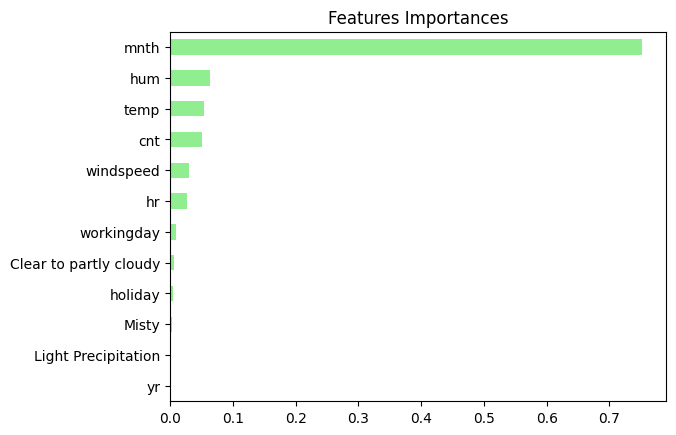

'Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!'

In [55]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)


# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


"Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!"